In [83]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sn

import mne
import matplotlib.pyplot

from LoadData import LoadData
from Filter import Filter

import random
import scipy
import seaborn as sns

In [84]:
# Function to calculate the psd of the channels and return as dataframe
# Estimate power spectral density using Welch’s method and Hanning window. 

def calculate_psd(data, average):
    
    welch_channel = []
    sampling_rate = 250.4
    nperseg = 1252
    
    for data_array in data:
        f, psd = scipy.signal.welch(data_array, sampling_rate, window = 'hann', nperseg = nperseg) #nperseg?
        # f might be needed for plotting?
        welch_channel.append(psd)
        
    df_psd = pd.DataFrame(welch_channel)
        
    if average == True:
        mean_values = df_psd.mean(axis = 0)
        mean_psd = mean_values.to_numpy()
        return mean_psd
    else:
        return df_psd

In [85]:
gap_animals = ["S7063", "S7064", "S7069"]
wt_animals = ["S7068", "S7070", "S7071"] 

In [86]:
gap_rec = [f for f in os.listdir() if "GAP.npy" in f]
wt_rec = [f for f in os.listdir() if "WT.npy" in f] 

In [87]:
os.chdir('/Volumes/Gonzalez-Sulser/SYNGAP SLEEP 24hr PAPER/Circadian-ETX/SYNGAP_brain_states/baseline_brain_states')
br_1_S7063 = pd.read_pickle('brain_states_1_S7063.pkl')
br_1_S7064 = pd.read_pickle('brain_states_1_S7064.pkl')
br_1_S7069 = pd.read_pickle('brain_states_1_S7069.pkl')
br_1_S7068 = pd.read_pickle('brain_states_1_S7068.pkl')
br_1_S7070 = pd.read_pickle('brain_states_1_S7070.pkl')
br_1_S7071 = pd.read_pickle('brain_states_1_S7071.pkl')

In [88]:
directory = '/Volumes/Macintosh HD/Users/gokceuzun/Desktop/4. SENE/Honors Project/'

# Here choose the animal recording, start/end and corresponding brain state
filename = 'S7063_GAP.npy'
start = 15324481
end = 36959040
brain_state = br_1_S7063

# Load the recording, slice and filter it
data = LoadData(directory, filename)
unfiltered_data = data.get_dat()[:, start:end]
fltr = Filter(unfiltered_data)
filtered_data = np.array(fltr.butter_bandpass())

### 1) Extract epochs for each sleep stage  
### 2) Plot the raw recordings of those epochs

#### Wake  

In [161]:
# Taking 5 consecutive epochs
wake = brain_state.loc[brain_state.brainstate == 0]
n = random.randint(0, len(wake)-5)
wake = wake[n:n+5] 
wake

# Or a single epoch
wake = brain_state.loc[brain_state.brainstate == 0].sample()

# Or all epochs?
#wake = brain_state.loc[brain_state.brainstate == 0]

In [162]:
# Be careful, not all epochs are consecutive representations! Different sleep stages might interrupt!
wake_time_start = int(wake.start_epoch.iloc[0] * 250.4)
wake_time_end = int(wake.end_epoch.iloc[len(wake)-1] * 250.4)
w = filtered_data[:, wake_time_start:wake_time_end] 

Creating RawArray with float64 data, n_channels=16, n_times=1252
    Range : 0 ... 1251 =      0.000 ...     4.996 secs
Ready.


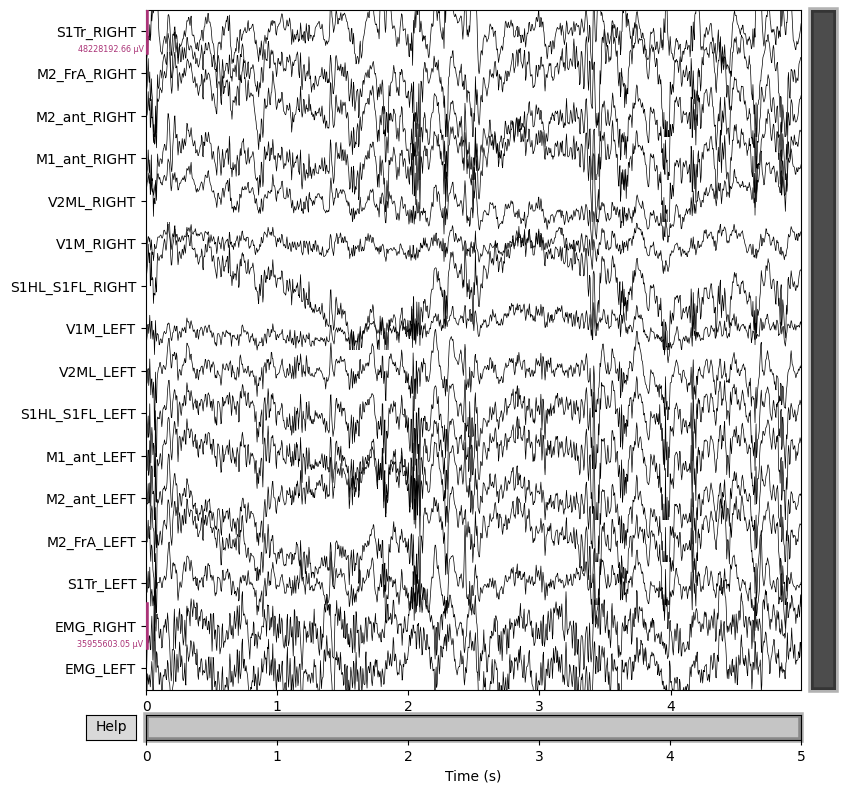

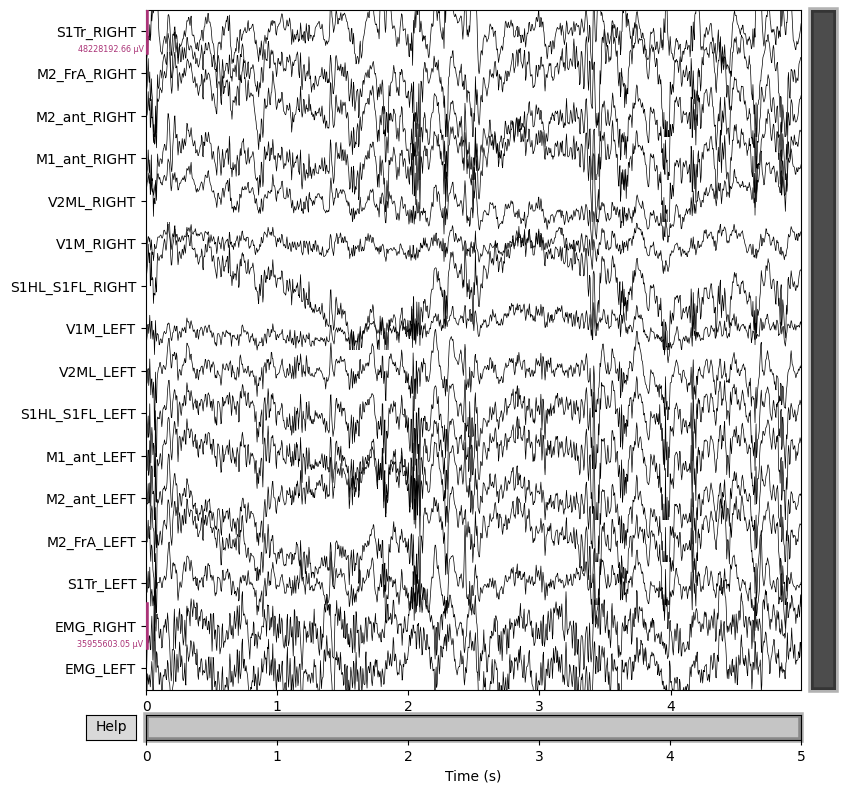

In [163]:
ch_names = ['S1Tr_RIGHT', 'EMG_RIGHT', 'M2_FrA_RIGHT','M2_ant_RIGHT','M1_ant_RIGHT', 'V2ML_RIGHT',
            'V1M_RIGHT', 'S1HL_S1FL_RIGHT', 'V1M_LEFT', 'V2ML_LEFT', 'S1HL_S1FL_LEFT',
            'M1_ant_LEFT','M2_ant_LEFT','M2_FrA_LEFT', 'EMG_LEFT', 'S1Tr_LEFT']

ch_types = ['eeg', 'emg', 'eeg', 'eeg', 'eeg', 'eeg',
           'eeg', 'eeg', 'eeg', 'eeg', 'eeg',
           'eeg', 'eeg', 'eeg', 'emg', 'eeg']

raw_info = mne.create_info(ch_names, sfreq = 250.4, ch_types=ch_types)
raw = mne.io.RawArray(w, raw_info)
raw.plot(scalings="auto")

In [92]:
# Plot PSD - (from old code)

#wake_psd = calculate_psd(w, False).T
#wake_psd.set_axis(['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16'], axis="columns", inplace=True)
##wake_df.plot(subplots=True, figsize=(20, 20), layout=(4, 4))
#fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
#wake_psd.plot(ax=ax1, xlim=(1,100))
#plt.semilogy(wake_psd) # plotting with log scale on the y axis
#plt.xlim([1, 100])
#plt.show()

#### Nonrem

In [170]:
# Taking 5 consecutive epochs
nonrem = brain_state.loc[brain_state.brainstate == 1]
n = random.randint(0, len(nonrem)-5)
nonrem = nonrem[n:n+5] 
nonrem

# Or a single epoch
nonrem = brain_state.loc[brain_state.brainstate == 1].sample()

# Or all epochs?
#nonrem = brain_state.loc[brain_state.brainstate == 1]

In [171]:
nonrem_time_start = int(nonrem.start_epoch.iloc[0] * 250.4)
nonrem_time_end = int(nonrem.end_epoch.iloc[len(nonrem)-1] * 250.4)
nr = filtered_data[:, nonrem_time_start:nonrem_time_end] 

Creating RawArray with float64 data, n_channels=16, n_times=1252
    Range : 0 ... 1251 =      0.000 ...     4.996 secs
Ready.


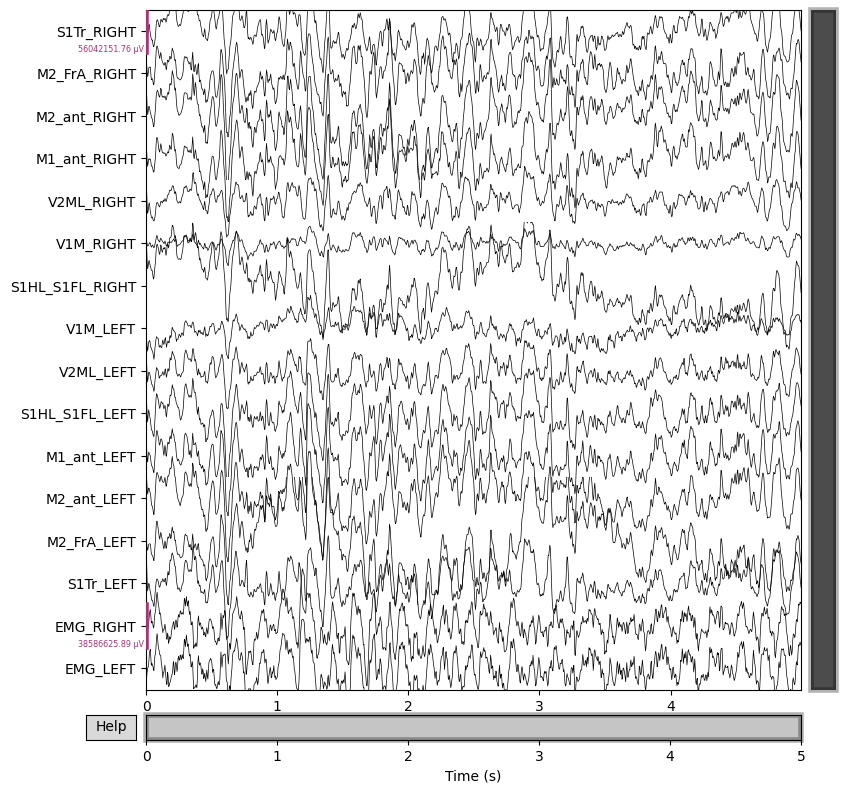

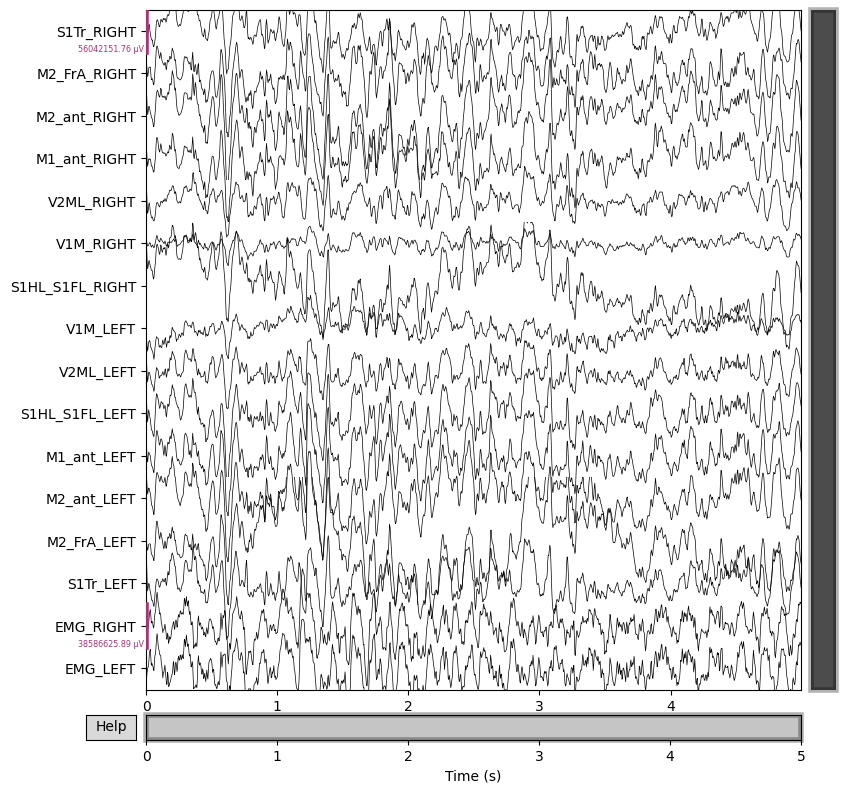

In [172]:
raw_info = mne.create_info(ch_names, sfreq = 250.4, ch_types=ch_types)
raw = mne.io.RawArray(nr, raw_info)
raw.plot(scalings="auto")

In [96]:
# Plot PSD - (from old code)

#nr_psd = calculate_psd(nr, False).T
#nr_psd.set_axis(['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16'], axis="columns", inplace=True)
##nr_df.plot(subplots=True, figsize=(20, 20), layout=(4, 4))
#fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
#nr_psd.plot(ax=ax1, xlim=(1,100))
#plt.semilogy(nr_psd)
#plt.xlim([1, 100])
#plt.show()

#### Rem

In [173]:
# Taking 5 consecutive epochs
rem = brain_state.loc[brain_state.brainstate == 2]
n = random.randint(0, len(rem)-5)
rem = rem[n:n+5] 
rem

# Or a single epoch
rem = brain_state.loc[brain_state.brainstate == 2].sample()

# Or a all epochs?
#rem = brain_state.loc[brain_state.brainstate == 2]

In [174]:
rem_time_start = int(rem.start_epoch.iloc[0] * 250.4)
rem_time_end = int(rem.end_epoch.iloc[len(rem)-1] * 250.4)
r = filtered_data[:, rem_time_start:rem_time_end] 

Creating RawArray with float64 data, n_channels=16, n_times=1252
    Range : 0 ... 1251 =      0.000 ...     4.996 secs
Ready.


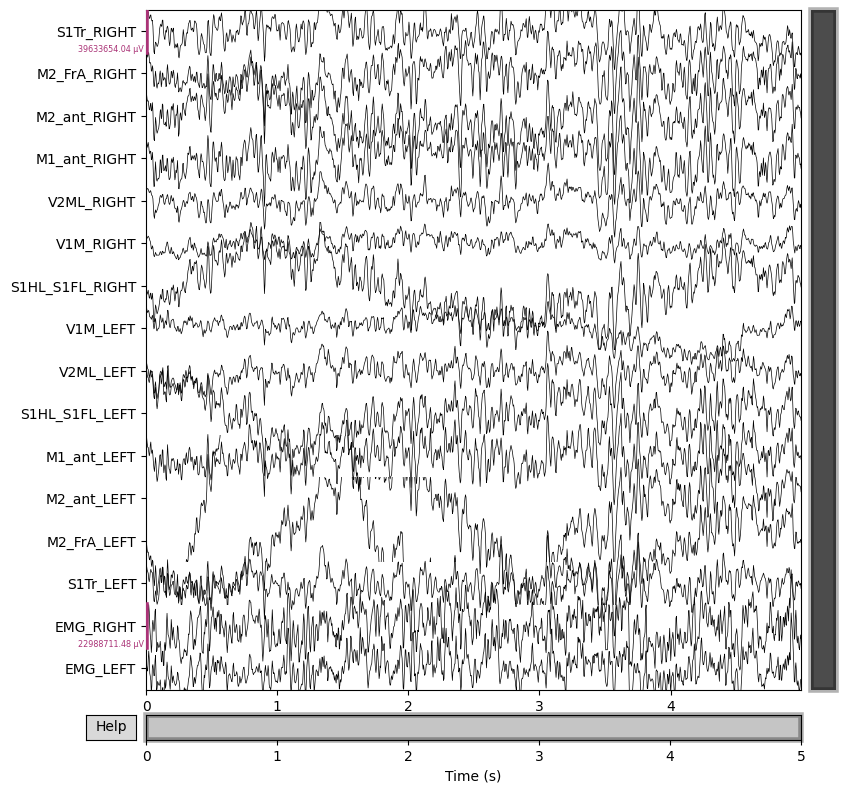

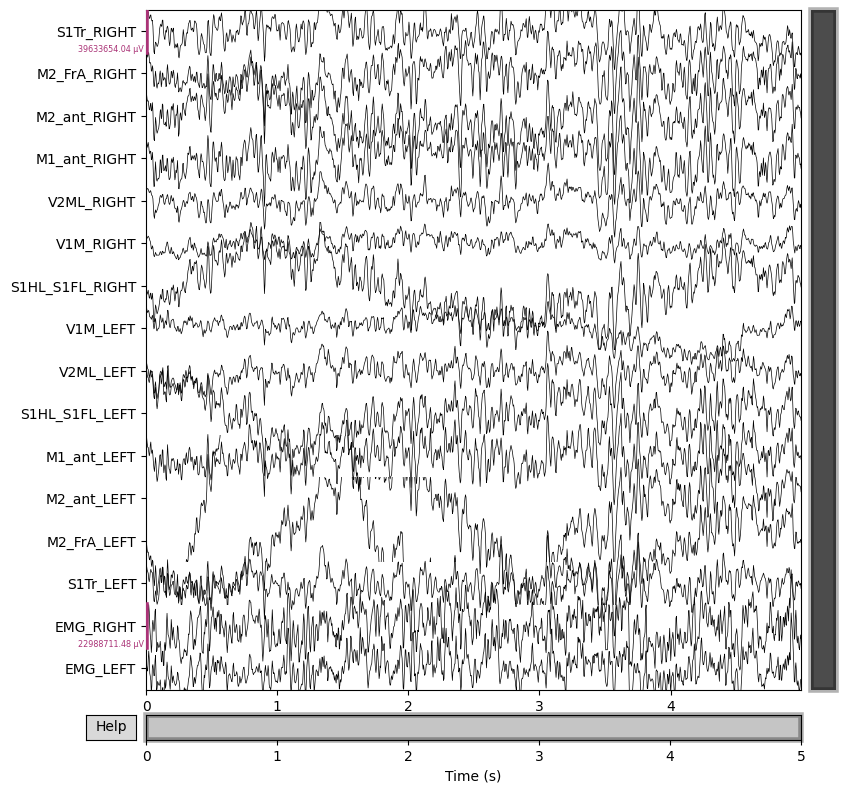

In [175]:
raw_info = mne.create_info(ch_names, sfreq = 250.4, ch_types=ch_types)
raw = mne.io.RawArray(r, raw_info)
raw.plot(scalings="auto")

In [100]:
# Plot PSD - (from old code)

#r_psd = calculate_psd(r, False).T
#r_psd.set_axis(['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16'], axis="columns", inplace=True)
##rem_df.plot(subplots=True, figsize=(20, 20), layout=(4, 4))
#fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
#r_psd.plot(ax=ax1, xlim=(1,100))
#plt.semilogy(r_psd)
#plt.xlim([1, 100])
#plt.show()

### 3) Calculate the correlation matrices for those to decide on the channels 
    FEATURE SELECTION   
Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

 - ch1 : S1Tr_RIGHT (eeg)     
 - ch2 : EMG_RIGHT (emg)     
ch3 : M2_FrA_RIGHT (eeg)  
ch4 : M2_ant_RIGHT (eeg)  
ch5 : M1_ant_RIGHT (eeg)  
ch6 : V2ML_RIGHT (eeg)    
ch7 : V1M_RIGHT (eeg)    
ch8 : S1HL_S1FL_RIGHT (eeg)  
ch9 : V1M_LEFT (eeg)  
ch10 : V2ML_LEFT (eeg)  
ch11 : S1HL_S1FL_LEFT (eeg)  
ch12 : M1_ant_LEFT (eeg)  
ch13 : M2_ant_LEFT (eeg)       
 - ch14 : M2_FrA_LEFT (eeg)  
ch15: EMG_LEFT (emg)  
ch16: S1Tr_LEFT (eeg)  
 - One EEG channel and one EMG channel (e.g channel 2 and channel 1 or 14) - Melissa

#### Wake

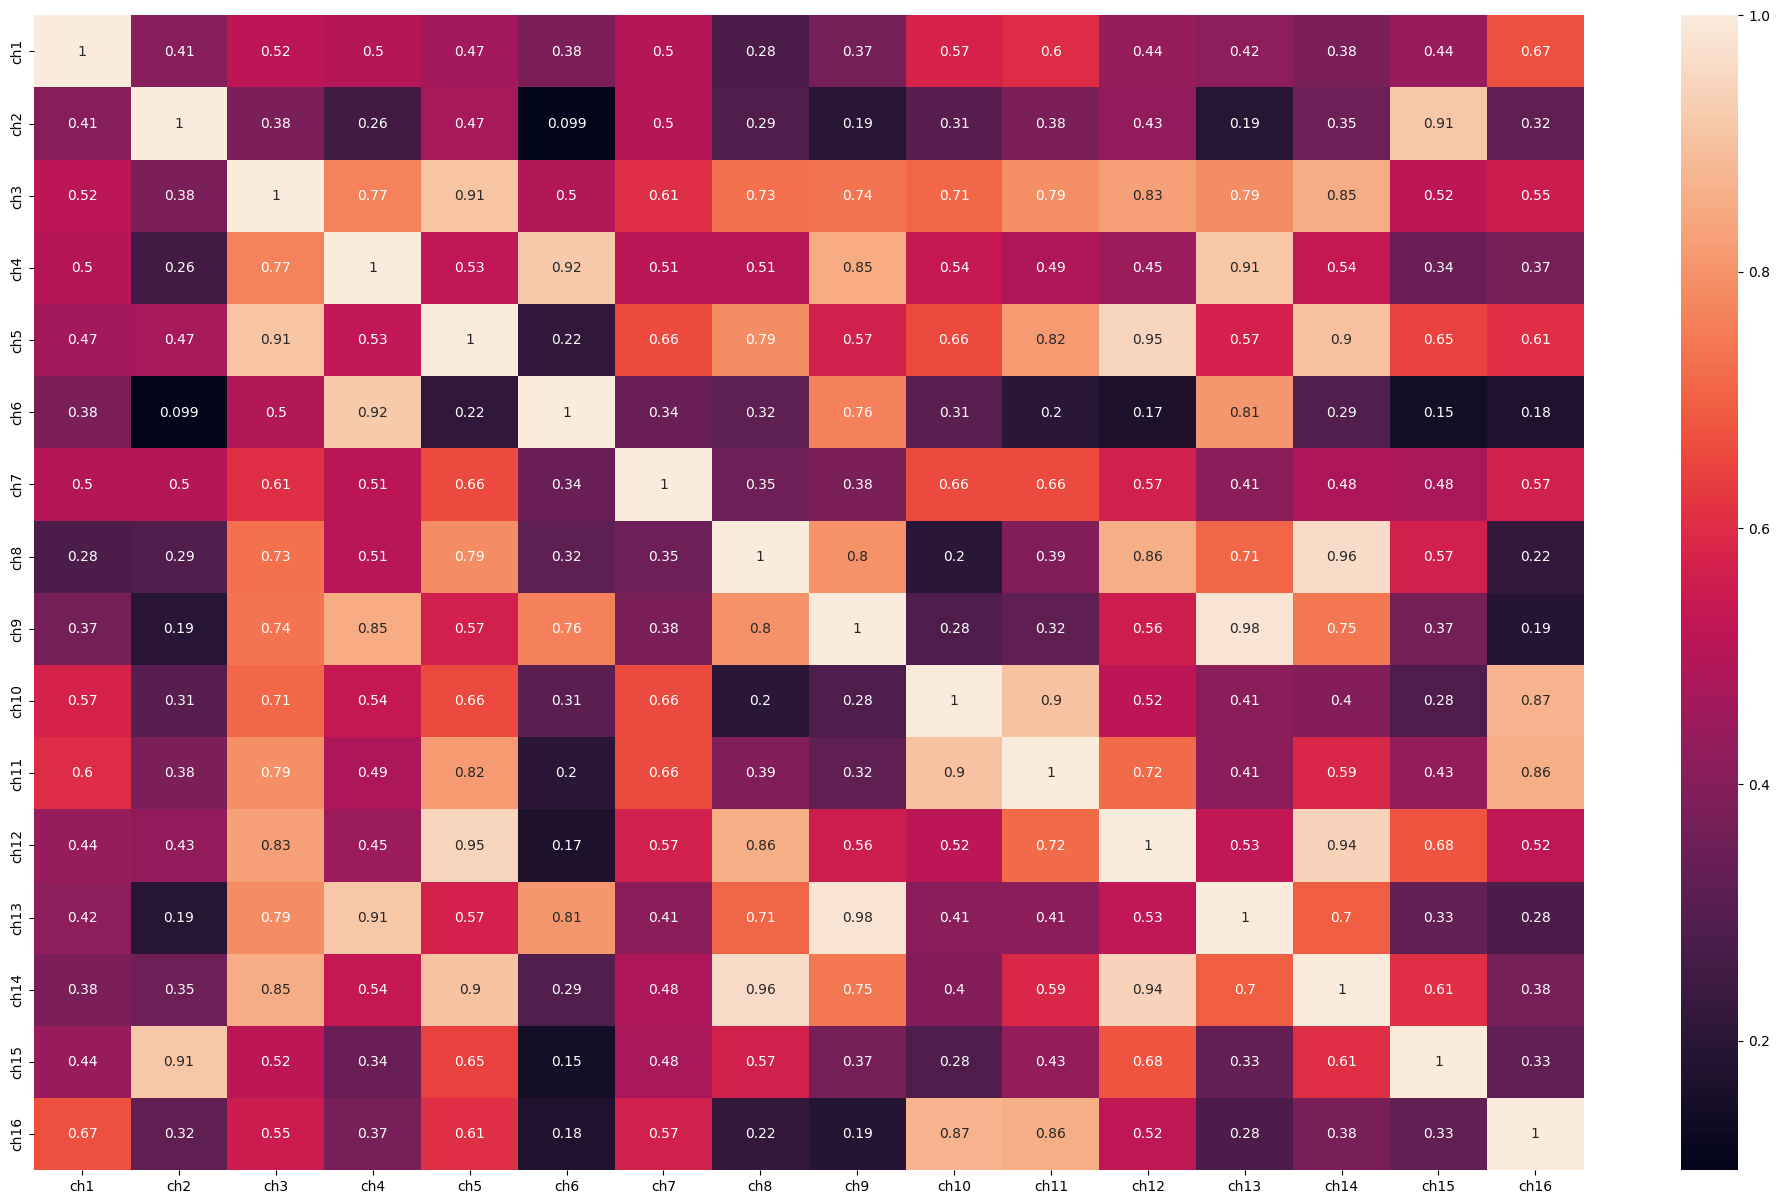

In [176]:
# Wake
wake_psd = calculate_psd(w, False).T
wake_psd.set_axis(['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16'], axis="columns", inplace=True)

f = plt.figure(figsize=(25, 15))
w_corrMatrix = wake_psd.corr()
sns.heatmap(w_corrMatrix, annot=True)
plt.show()

In [186]:
w_corr = w_corrMatrix.unstack()
sorted_corr = w_corr.sort_values(kind="quicksort")
sorted_corr['ch2']

ch6     0.098932
ch13    0.190813
ch9     0.194970
ch4     0.255682
ch8     0.286965
ch10    0.307517
ch16    0.320825
ch14    0.353647
ch3     0.378800
ch11    0.381406
ch1     0.408252
ch12    0.428859
ch5     0.468833
ch7     0.501944
ch15    0.912040
ch2     1.000000
dtype: float64

#### Nonrem

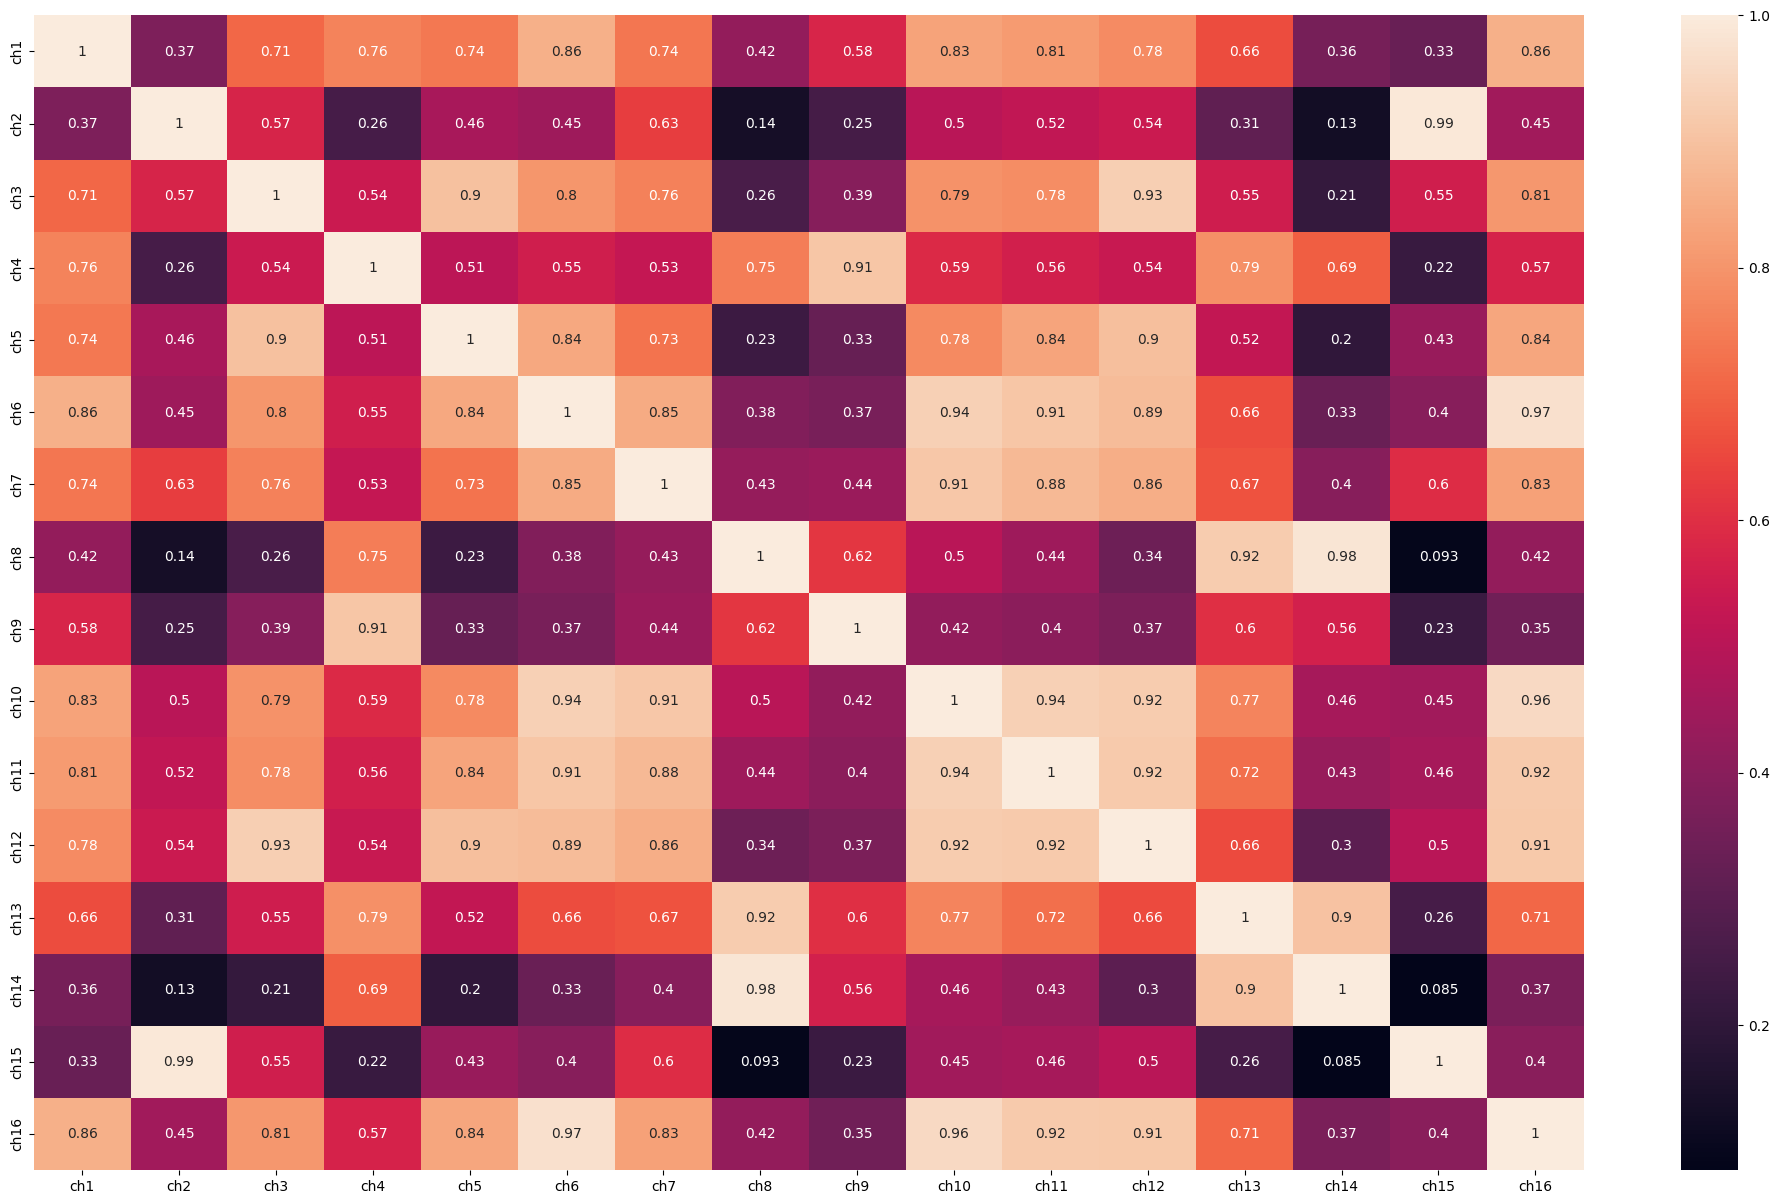

In [178]:
nr_psd = calculate_psd(nr, False).T
nr_psd.set_axis(['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16'], axis="columns", inplace=True)

f = plt.figure(figsize=(25, 15))
nr_corrMatrix = nr_psd.corr()
sns.heatmap(nr_corrMatrix, annot=True)
plt.show()

In [179]:
nr_corr = nr_corrMatrix.unstack()
sorted_corr = nr_corr.sort_values(kind="quicksort")
sorted_corr['ch2']

ch15  ch14    0.084860
ch14  ch15    0.084860
ch15  ch8     0.092726
ch8   ch15    0.092726
ch2   ch14    0.130867
                ...   
ch4   ch4     1.000000
ch3   ch3     1.000000
ch2   ch2     1.000000
ch15  ch15    1.000000
ch16  ch16    1.000000
Length: 256, dtype: float64

#### Rem

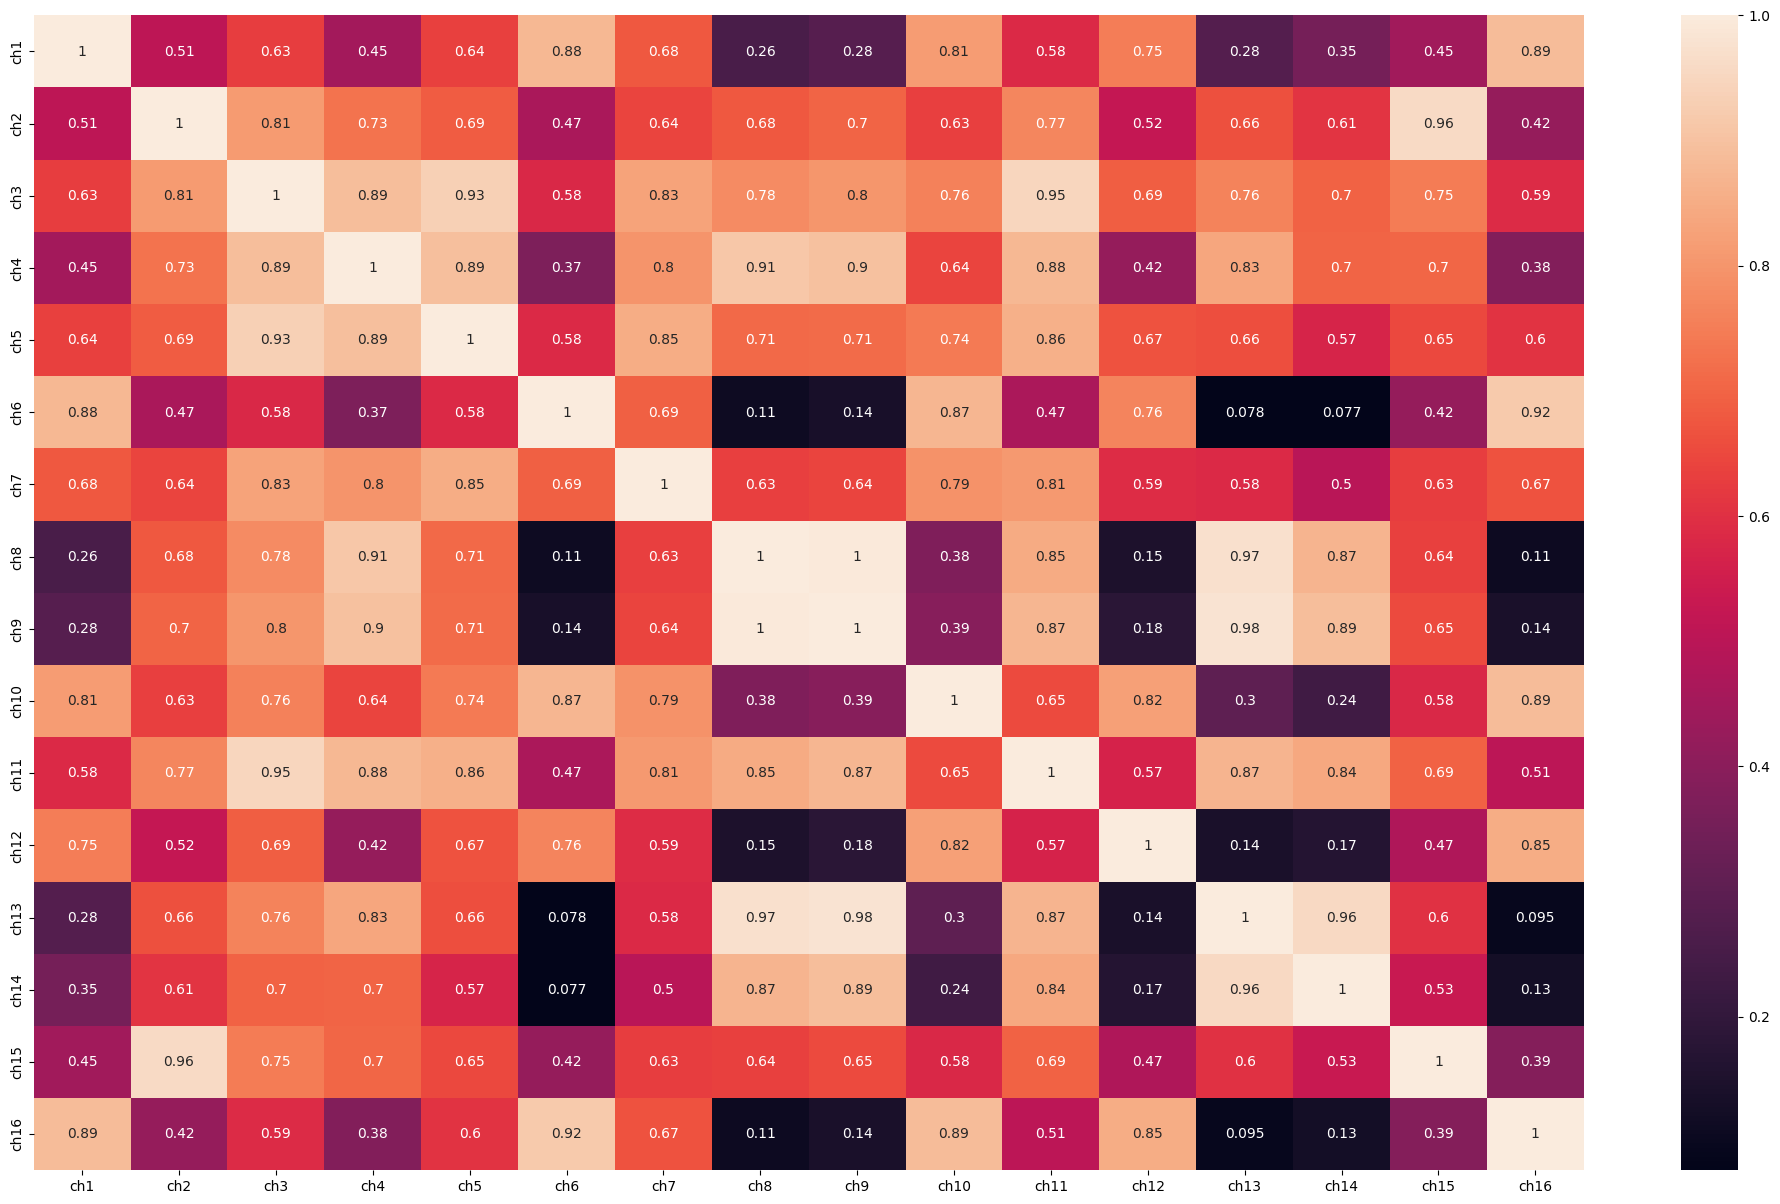

In [180]:
r_psd = calculate_psd(r, False).T
r_psd.set_axis(['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16'], axis="columns", inplace=True)

f = plt.figure(figsize=(25, 15))
r_corrMatrix = r_psd.corr()
sns.heatmap(r_corrMatrix, annot=True)
plt.show()

In [185]:
r_corr = r_corrMatrix.unstack()
sorted_corr = r_corr.sort_values(kind="quicksort")
sorted_corr['ch2']

ch16    0.422153
ch6     0.466241
ch1     0.509287
ch12    0.521668
ch14    0.607840
ch10    0.629358
ch7     0.642251
ch13    0.662724
ch8     0.677343
ch5     0.685347
ch9     0.698415
ch4     0.729275
ch11    0.766909
ch3     0.812046
ch15    0.959157
ch2     1.000000
dtype: float64

In [ ]:
# Calculate corr matrix for how many epochs?
# One EEG channel and one EMG channel - eeg channels that are least correlated with the emg channels? 
# Average PSD? 
# Keep channels mostly correlated with the average?  